In [37]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Theano
- https://datascienceschool.net/view-notebook/a7ce18eb02b54cbfa760636cc76a4640/

>스칼라, 벡터, 행렬을 정의하기 위해 `theano.tensor.T` 서브패키지의 `dscalar`, `dvector`, `dmatrix` 명령을 사용하거나 이미 심볼로 정의된 변수의 연산을 통해 자동으로 정의된다. 명령어 앞에 붙은 d는 double 자료형을 나타낸다.

In [1]:
# MKL 라이브러리가 설치되어 있으면 다음 코드를 우선 실행한다.
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [2]:
import theano
import theano.tensor as T

In [3]:
x1 = T.dscalar('x1')
y1 = T.dscalar('y1')

In [4]:
type(x1), type(y1)

(theano.tensor.var.TensorVariable, theano.tensor.var.TensorVariable)

In [5]:
x2 = T.dvector('x2')
y2 = T.dvector('y2')

x3 = T.dmatrix('x3')
y3 = T.dmatrix('y3')

In [6]:
# 심볼관계정의 (수식사용시 numpy사용하면 안되고,,, Theano에 있는 수식으로 사용가능함)----------

z1 = x1 + y1

type(z1)

theano.tensor.var.TensorVariable

In [7]:
u1 = T.exp(z1)
type(u1)

theano.tensor.var.TensorVariable

In [8]:
z2 = T.dot(x2,y2)
z3 = T.sum(x3) + T.mean(y3)

In [9]:
# 심볼 프린트-------------------------------------------------------------------------------------
theano.printing.pprint(x1)


'x1'

In [10]:
theano.printing.pprint(y1)

'y1'

In [11]:
theano.printing.pprint(z1)

'(x1 + y1)'

In [12]:
theano.printing.pprint(u1)

'exp((x1 + y1))'

In [46]:
from IPython.display import SVG
import pydot
print(pydot.find_graphviz())

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/creal/graphviz-2.38/release/bin'


AttributeError: module 'pydot' has no attribute 'find_graphviz'

In [47]:
SVG(theano.printing.pydotprint(z1, return_image=True, format='svg'))

RuntimeError: ('Failed to import pydot. You must install graphviz and either pydot or pydot-ng for `pydotprint` to work.', "pydot-ng can't find graphviz. Install graphviz.")

In [15]:
#심볼함수

%time f1 = theano.function(inputs=[x1, y1], outputs=z1)

Wall time: 2.65 s


In [16]:
f1(1, 2)

array(3.0)

In [17]:
f2 = theano.function([x2, y2], z2)
f2([1, 2], [3, 4])

array(11.0)

In [18]:
f3 = theano.function([x3, y3],z3)
f3([[1],[2]],[[3],[4]])

array(6.5)

In [20]:
# 로지스틱함수나 난수를 사용하는 함수는 다음과 같이 정의한다.
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
logistic(1)

array(0.7310585786300049)

In [22]:
s2 = 1/(1+T.exp(-x2))
logistic2 = theano.function([x2],s2)
logistic2([0,1])

array([ 0.5       ,  0.73105858])

In [23]:
# 난수발생도 theano의 Randomstream명령을 사용해야한다
from theano.tensor.shared_randomstreams import RandomStreams

srng = RandomStreams(0)
rv_u = srng.uniform()
f_rv_u = theano.function([],rv_u)

In [24]:
f_rv_u(),f_rv_u(),f_rv_u(),f_rv_u()

(array(0.4860473230215504),
 array(0.6857123175110225),
 array(0.9855760506615988),
 array(0.1955964101622225))

### 변수갱신

In [26]:
x = T.dscalar('x')
y = x
w = theano.shared(0.0, name="w")
update = theano.function([x],y,updates=[(w,w+x)])

In [27]:
w.set_value(f_rv_u())
w.get_value()

array(0.583411673483624)

In [28]:
update(1)
w.get_value()

array(1.5834116734836239)

In [29]:
update(2)
w.get_value()

array(3.583411673483624)

In [30]:
update(1)
w.get_value()

array(4.583411673483624)

In [42]:
x1 = T.dvector('x1')
y1 = x1 ** 10
f1 = theano.function([x1], y1)

In [43]:
SVG(theano.printing.pydotprint(f1, return_image=True, format='svg'))

RuntimeError: ('Failed to import pydot. You must install graphviz and either pydot or pydot-ng for `pydotprint` to work.', "pydot-ng can't find graphviz. Install graphviz.")

In [48]:
x1 = np.ones(10000000)

In [49]:
%timeit x1 ** 10

120 ms ± 7.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
%timeit f1(x1)

46.3 ms ± 3.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
#미분
x1 = T.dscalar('x1')
y1 = x1 ** 2
gy1 = T.grad(y1, x1)
fy1 = theano.function([x1], y1)
fgy1 = theano.function([x1], gy1)

In [52]:
x1 = T.dscalar('x1')
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
gs1 = T.grad(s1, x1)
dlogistic = theano.function([x1], gs1)

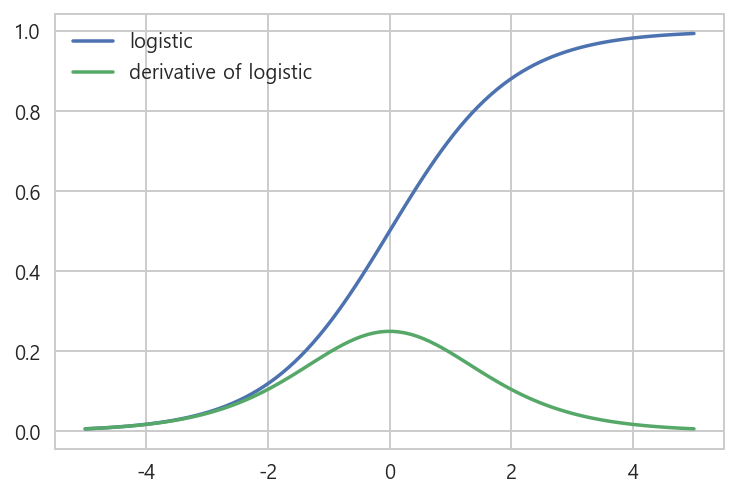

In [53]:
xx = np.linspace(-5, 5, 100)
y1 = np.hstack([logistic(xi) for xi in xx])
y2 = np.hstack([dlogistic(xi) for xi in xx])
plt.plot(xx, y1, label="logistic")
plt.plot(xx, y2, label="derivative of logistic")
plt.legend(loc=0)
plt.show()

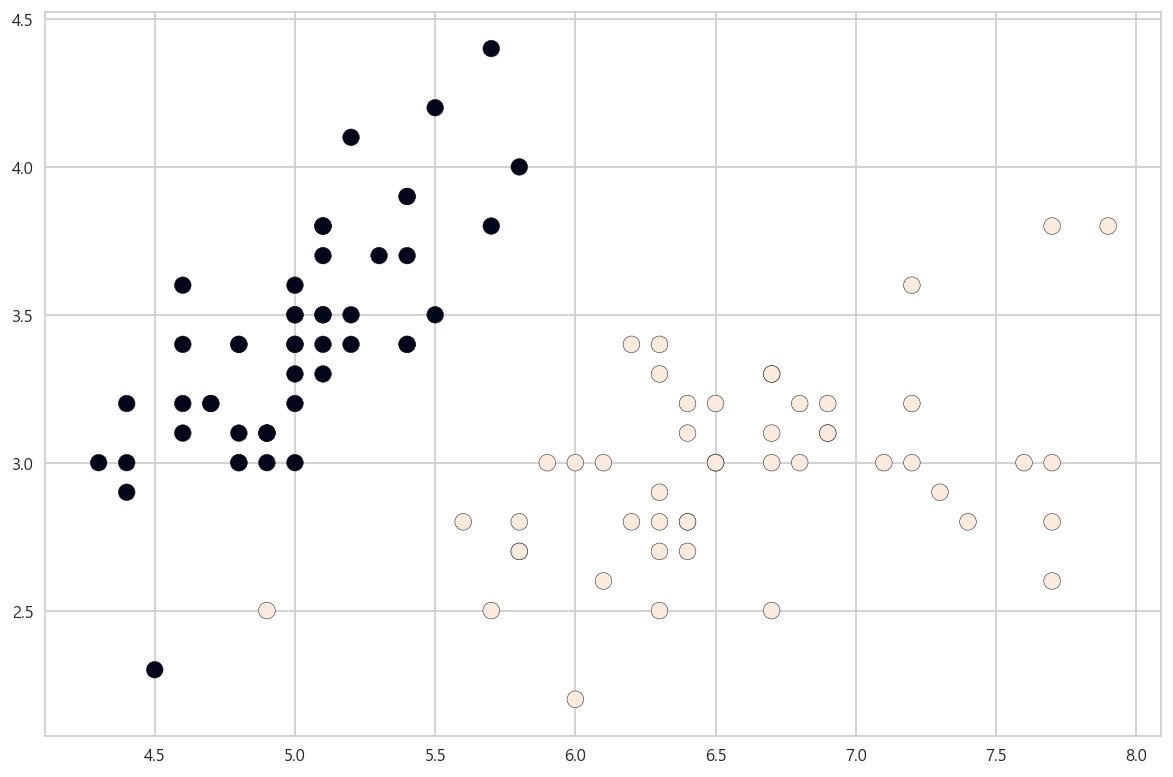

In [54]:
#퍼셉트론구현

from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] - 1  # y=1 또는 y=-1

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [55]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")
z = T.tanh(T.dot(X, w) + b)
cost = T.sum(T.maximum(0, -y * z))

In [56]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-7
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [57]:
for i in range(100):
    cost_i = train(X_data, y_data)
    if i % 10 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  0.5588424928848522
  10:  0.4645058718722919
  20:  0.3701625011442721
  30:  0.27581374670328085
  40:  0.18146097498533956
  50:  0.08710555275029427
  60:  0.0017481157550485488
  70:  0.0003194822026270444
  80:  0.00029294220762885446
  90:  0.00029210620994642254


In [58]:
y_pred = T.sgn(z) # -1 ~ 1 => -1 또는 1 
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.])

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 1, 49]], dtype=int64)

# 연습문제 1
- 위코드를 아래와 같이 고쳐라

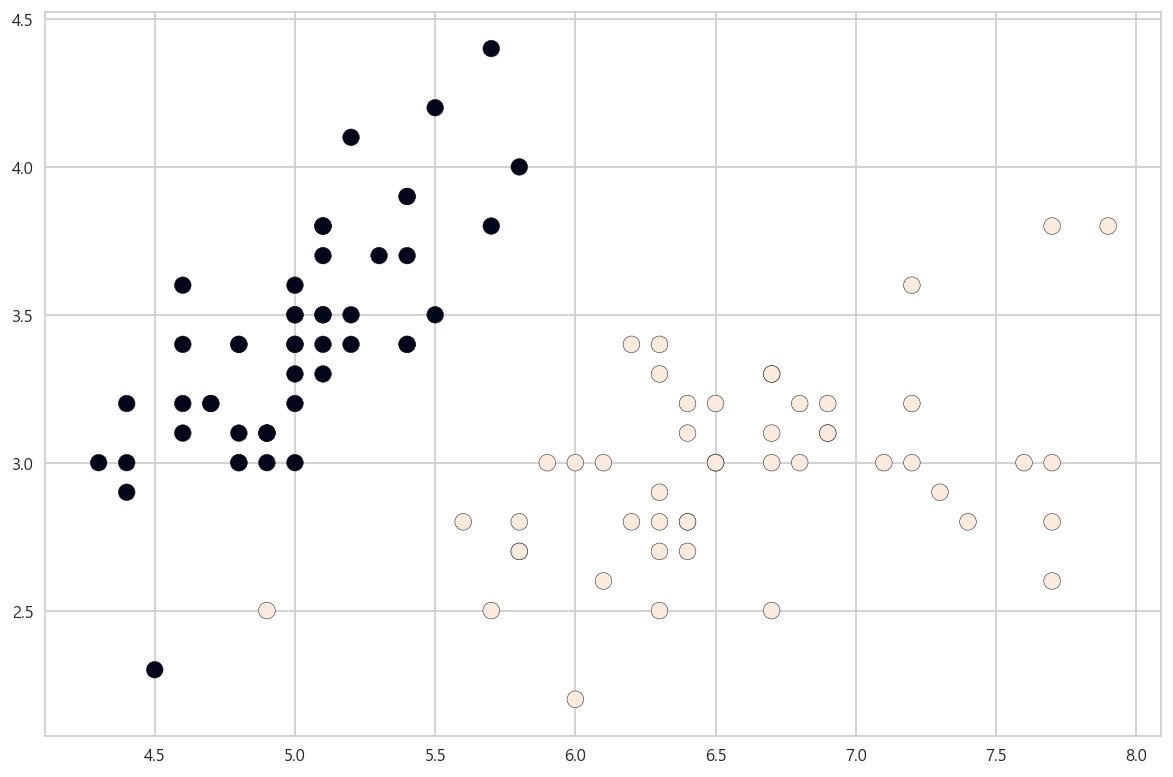

In [66]:
#퍼셉트론구현

from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] / 2  # y=1 또는 y=0

plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [136]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")

z = 1 / (1 + T.exp(-(T.dot(X, w) + b)))

cost = T.sum((y - z)**2)


In [137]:
gw, gb = T.grad(cost, [w, b])
mu = 3e-3
train = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [138]:
for i in range(1000):
    cost_i = train(X_data, y_data)
    if i % 100 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  24.9683287358724
 100:  6.2927007228728655
 200:  3.946278197220355
 300:  3.0454748976610317
 400:  2.5619432017221064
 500:  2.2570973957582954
 600:  2.045743897530579
 700:  1.889701392291189
 800:  1.769227643059599
 900:  1.6730521971510077


In [139]:
y_pred = T.round(z) # -1 ~ 1 => -1 또는 1 
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [140]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 0, 50]], dtype=int64)